<a href="https://colab.research.google.com/github/benchov/AlgoTrading/blob/master/Backtesting_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports

In [41]:
!pip install yfinance
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pandas as pd
import numpy as np 
import yfinance as yf
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

#### Data Extraction

In [43]:
start_date = '2017-01-01'
end_date = '2022-06-01'
symbol = "SPY"
data = yf.download(symbol, start_date, end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,203.788055,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,205.000473,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,204.837555,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,205.570404,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,204.891846,46939700


#### Feature Adjustments

In [44]:
# add moving avarages
data['ma_12'] = data["Adj Close"].rolling(window=12).mean()
data['ma_21'] = data['Adj Close'].rolling(window=21).mean()
# creating ma cross signal
data.loc[data['ma_12'] > data['ma_21'], "signal"] = 1
data.loc[data['ma_12'] <= data['ma_21'], "signal"] = 0
data["signal"] = data['signal'].shift(1)
data.head(5)

,Open,High,Low,Close,Adj Close,Volume,ma_12,ma_21,signal
Date,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,203.788055,91366500,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,205.000473,78744400,NaN,NaN,NaN
2017-01-05,226.270004,226.580002,225.479996,226.399994,204.837555,78379000,NaN,NaN,NaN
2017-01-06,226.529999,227.750000,225.899994,227.210007,205.570404,71559900,NaN,NaN,NaN
2017-01-09,226.910004,227.070007,226.419998,226.460007,204.891846,46939700,NaN,NaN,NaN


In [45]:
# create and add benchmark returns
data['lrets_bench'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data['lrets_prod_bench'] = data['lrets_bench'].cumsum()
data['prod_bench'] = np.exp(data['lrets_prod_bench']) -1
data.head()

,Open,High,Low,Close,Adj Close,Volume,ma_12,ma_21,signal,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,203.788055,91366500,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,205.000473,78744400,NaN,NaN,NaN,0.005932,0.005932,0.005949
2017-01-05,226.270004,226.580002,225.479996,226.399994,204.837555,78379000,NaN,NaN,NaN,-0.000795,0.005137,0.005150
2017-01-06,226.529999,227.750000,225.899994,227.210007,205.570404,71559900,NaN,NaN,NaN,0.003571,0.008708,0.008746
2017-01-09,226.910004,227.070007,226.419998,226.460007,204.891846,46939700,NaN,NaN,NaN,-0.003306,0.005402,0.005416


In [46]:
# create and add strategy returns
data['lrets_strat'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1)) * data['signal']
data['lrets_prod_strat'] = data['lrets_strat'].cumsum()
data['prod_strat'] = np.exp(data['lrets_prod_strat']) -1
data[:120]

,Open,High,Low,Close,Adj Close,Volume,ma_12,ma_21,signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,203.788055,91366500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,205.000473,78744400,NaN,NaN,NaN,0.005932,0.005932,0.005949,NaN,NaN,NaN
2017-01-05,226.270004,226.580002,225.479996,226.399994,204.837555,78379000,NaN,NaN,NaN,-0.000795,0.005137,0.005150,NaN,NaN,NaN
2017-01-06,226.529999,227.750000,225.899994,227.210007,205.570404,71559900,NaN,NaN,NaN,0.003571,0.008708,0.008746,NaN,NaN,NaN
2017-01-09,226.910004,227.070007,226.419998,226.460007,204.891846,46939700,NaN,NaN,NaN,-0.003306,0.005402,0.005416,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-19,243.589996,244.729996,243.479996,244.660004,223.405685,65123800,221.707841,220.513452,1.0,0.008291,0.091909,0.096265,0.008291,0.060138,0.061983
2017-06-20,244.250000,244.259995,242.990005,243.009995,221.898987,56906400,221.709741,220.768106,1.0,-0.006767,0.085142,0.088871,-0.006767,0.053371,0.054821
2017-06-21,243.460007,243.589996,242.410004,242.949997,221.844254,55977600,221.720707,220.967795,1.0,-0.000247,0.084895,0.088603,-0.000247,0.053124,0.054560


In [47]:
# handle missing values
data.dropna(inplace=True)
data.isna().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
ma_12               0
ma_21               0
signal              0
lrets_bench         0
lrets_prod_bench    0
prod_bench          0
lrets_strat         0
lrets_prod_strat    0
prod_strat          0
dtype: int64

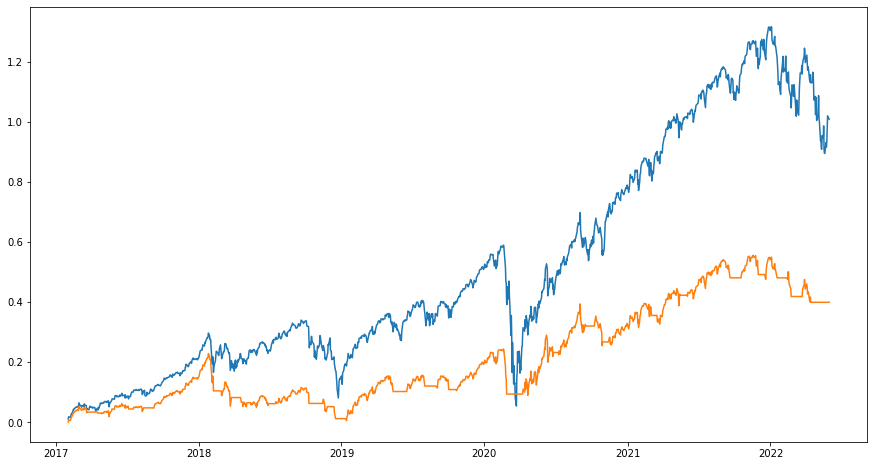

In [48]:
# plotting the test results
fig = plt.figure(figsize=(15,8))
plt.plot(data['prod_bench'])
plt.plot(data['prod_strat'])
plt.show()

In [49]:
print('Benchmark returns ', data['prod_bench'].iloc[-1])
print('Strategy returns ', data['prod_strat'].iloc[-1])

Benchmark returns  1.0093027163284765
Strategy returns  0.3994828319890693


In [50]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,ma_12,ma_21,signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2022-05-24,392.559998,395.149994,386.959991,393.890015,390.591339,91448800,392.868777,401.961984,0.0,-0.007663,0.650581,0.916655,-0.0,0.336103,0.399483
2022-05-25,392.309998,399.450012,391.890015,397.369995,394.042206,91472900,392.802668,401.077548,0.0,0.008796,0.659378,0.933588,0.0,0.336103,0.399483
2022-05-26,398.670013,407.040009,398.450012,405.309998,401.915710,82168300,393.316663,400.512794,0.0,0.019784,0.679162,0.972224,0.0,0.336103,0.399483
2022-05-27,407.910004,415.380005,407.700012,415.260010,411.782379,84768700,395.176788,399.920179,0.0,0.024253,0.703414,1.020640,0.0,0.336103,0.399483
2022-05-31,413.549988,416.459991,410.029999,412.929993,409.471893,95937000,396.878253,399.964094,0.0,-0.005627,0.697788,1.009303,-0.0,0.336103,0.399483


In [51]:
# Calculate Sharpe
def calculate_sharpe(returns):
    N = 255
    rf = 0.01
    SQRTN = np.sqrt(N)
    mean = returns.mean() * N
    sigma = returns.std() * SQRTN
    sharpe = round((mean - rf) / sigma, 3)
    return sharpe

In [52]:
# Show Sharpe
bench_sharpe = calculate_sharpe(data["lrets_bench"].values)
strat_sharpe = calculate_sharpe(data["lrets_strat"].values)
print("Benchmark Sharpe: ", bench_sharpe)
print("Strategy Sharpe: ", strat_sharpe)

Benchmark Sharpe:  0.614
Strategy Sharpe:  0.466
